# Converting tensorflow keras model to Edge TPU / TFLite

Steps

* Please upload your trained network here, e.g. as `face.h5`
* Also upload around 10-20 images of your face, e.g. in a folder "faces"
* Execute the cells and download the final model file to your computer and transfer it to your Raspberry Pi for further use.

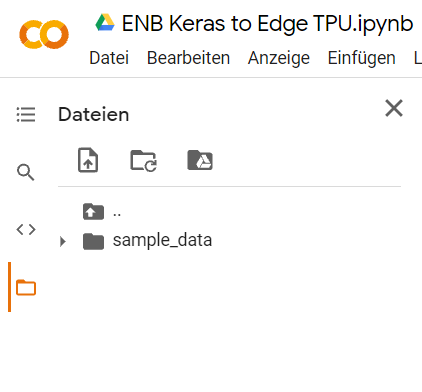

In [17]:
FOLDER_FOR_FACES = "faces/"
NEURAL_NET = "face.h5"

In [10]:
# Load libraries
import tensorflow as tf
import numpy as np
import imageio as io
from glob import glob

In [11]:
# Create a small dataset such that Tensorflow knows how to optimize the network for TFLITE
def dataset_gen():
  # Maybe adjust here the folder:
  for i in glob(FOLDER_FOR_FACES + "*.jpg"):
    yield [np.asarray(io.imread(i), dtype=np.float32)[None] / 255.]

In [12]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(NEURAL_NET)
converter.representative_dataset = dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmpezaabkj4/assets


INFO:tensorflow:Assets written to: /tmp/tmpezaabkj4/assets


INFO:tensorflow:Restoring parameters from /tmp/tmpezaabkj4/variables/variables


INFO:tensorflow:Restoring parameters from /tmp/tmpezaabkj4/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_18_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_18_input


INFO:tensorflow: tensor name: serving_default_conv2d_18_input:0, shape: (-1, 128, 128, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_18_input:0, shape: (-1, 128, 128, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /tmp/tmpezaabkj4/variables/variables


INFO:tensorflow:Restoring parameters from /tmp/tmpezaabkj4/variables/variables


In [13]:
with open(NEURAL_NET[:-3]+".tflite", "wb") as fp:
  fp.write(tflite_model)

In [14]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
!sudo apt-get update
!sudo apt-get install edgetpu-compiler


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  53978      0 --:--:-- --:--:-- --:--:-- 53978
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
H

Adjust the following line of code to your model name, e.g. face.tflite

In [16]:
!edgetpu_compiler face.tflite

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 158 ms.

Input model: anki_face_255.tflite
Input size: 162.45KiB
Output model: anki_face_255_edgetpu.tflite
Output size: 208.59KiB
On-chip memory used for caching model parameters: 178.00KiB
On-chip memory remaining for caching model parameters: 7.42MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 14
Operation log: anki_face_255_edgetpu.log
See the operation log file for individual operation details.
Compilation child process completed within timeout period.
Compilation succeeded! 


Now download the model and move it to the Raspberry Pi